In [61]:
%pylab inline
%config InlineBackend.figure_formats=['retina']

import pandas as pd
import seaborn as sns
import numpy as np
import os

Populating the interactive namespace from numpy and matplotlib


# SIMPLE EDA

In [62]:
#GETTING DATA

file_path=os.path.join("IBM_DATA","data","Ames_Housing_Data.tsv")
data=pd.read_csv(file_path,sep="\t")
data.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [63]:
#get features
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [64]:
#getting a full view of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [65]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

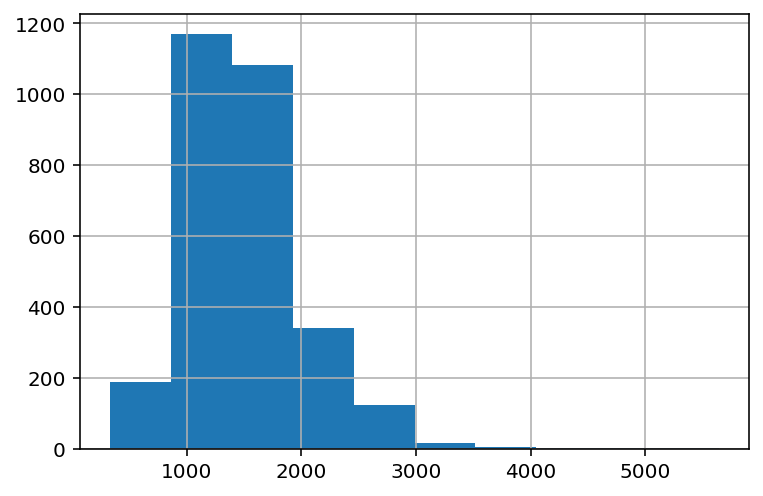

In [66]:
#histogram
data['Gr Liv Area'].hist()

<AxesSubplot:xlabel='Gr Liv Area'>

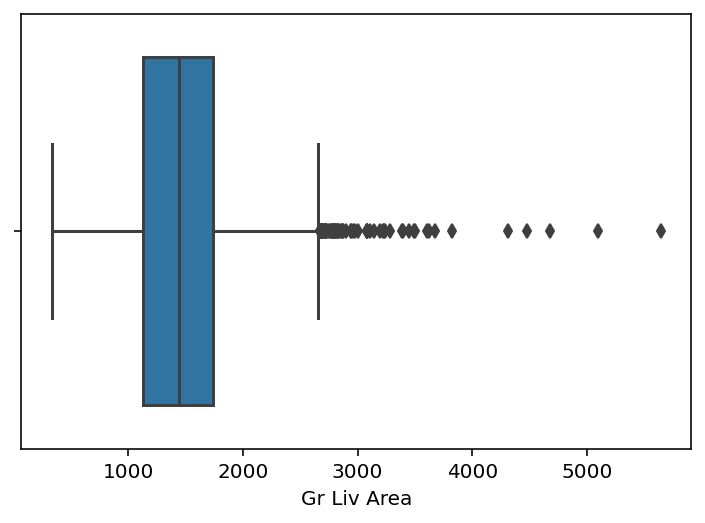

In [67]:
sns.boxplot(x=data["Gr Liv Area"])

In [68]:
#check the IQR

def getOutlierSummary(data):
    p_25,p_50,p_75=np.percentile(data,[25,50,75])
    print('25th Percentile: ',p_25)
    print('50th Percentile: ',p_50)
    print('75th Percentile: ',p_75)

    IQR=p_75-p_25
    print('IQR: ',IQR)

    left_outliers=p_25-(1.5*IQR)
    print('Left Outiler ',left_outliers)


    right_outliers=p_75+(1.5*IQR)
    print('Right Outiler ',right_outliers)
    print('Total DataPoints', len(data))
    outliers=[x for x in data if (x<left_outliers or x>right_outliers)]
    print('Total Outlier Points', len(outliers))

getOutlierSummary(data["Gr Liv Area"]) 

25th Percentile:  1126.0
50th Percentile:  1442.0
75th Percentile:  1742.75
IQR:  616.75
Left Outiler  200.875
Right Outiler  2667.875
Total DataPoints 2930
Total Outlier Points 75


25th Percentile:  1122.75
50th Percentile:  1438.5
75th Percentile:  1733.0
IQR:  610.25
Left Outiler  207.375
Right Outiler  2648.375
Total DataPoints 2904
Total Outlier Points 54


<AxesSubplot:xlabel='Gr Liv Area'>

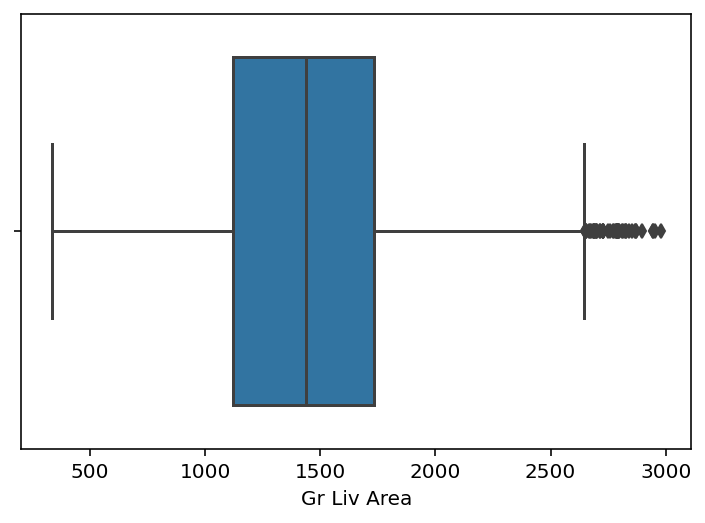

In [69]:
#remove the outliers

df=data.loc[data["Gr Liv Area"]<=3000]
data_rem_outliers=df.copy()

getOutlierSummary(data_rem_outliers["Gr Liv Area"]) 
sns.boxplot(x=data_rem_outliers["Gr Liv Area"])

In [70]:
data_rem_outliers.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [71]:
#number of observations present
data_rem_outliers.shape[0]

2904

In [72]:
#let no of unique ID present in PID
len(data_rem_outliers['PID'].unique())

2904

In [73]:
data_rem_outliers.drop(['PID','Order'],axis=1,inplace=True)
#axis 1 for column
#inplace to change/drop the coulmn in the same data frame without returning a new data frameP

In [74]:
data_rem_outliers

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# LOG TRANSFORMATION FOR SKEWED VARIABLES

In [75]:
#FILTER OUT ONLY NUMERICAL VARIABLES

In [76]:
data_rem_outliers.select_dtypes('number')

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,240,38,0,0,0,0,0,4,2006,170000


In [80]:
num_cols=data_rem_outliers.select_dtypes('number').columns

In [86]:
#CREATE A LIST OF FLOAT COLUMNS TO CHECK FOR SKEWING
# val >0 === right skew
# val <0 === left skew

skew_limit=0.75
skew_vals=data_rem_outliers[num_cols].skew()
skew_vals

MS SubClass         1.356089
Lot Frontage        1.100985
Lot Area           13.629626
Overall Qual        0.162063
Overall Cond        0.560678
Year Built         -0.599851
Year Remod/Add     -0.440541
Mas Vnr Area        2.529621
BsmtFin SF 1        0.821670
BsmtFin SF 2        4.100492
Bsmt Unf SF         0.925378
Total Bsmt SF       0.371552
1st Flr SF          0.825388
2nd Flr SF          0.806191
Low Qual Fin SF    13.739269
Gr Liv Area         0.650166
Bsmt Full Bath      0.618066
Bsmt Half Bath      3.964628
Full Bath           0.131126
Half Bath           0.715640
Bedroom AbvGr       0.230702
Kitchen AbvGr       4.310020
TotRms AbvGrd       0.633498
Fireplaces          0.740663
Garage Yr Blt      -0.374453
Garage Cars        -0.215950
Garage Area         0.211937
Wood Deck SF        1.812343
Open Porch SF       2.504033
Enclosed Porch      3.978965
3Ssn Porch         11.352009
Screen Porch        3.962789
Pool Area          19.810791
Misc Val           22.145294
Mo Sold       

In [91]:
#FILTER OUT THE COLUMNS TO 0.75 skew limit

skew_cols=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=False)
skew_cols

Misc Val           22.145294
Pool Area          19.810791
Low Qual Fin SF    13.739269
Lot Area           13.629626
3Ssn Porch         11.352009
Kitchen AbvGr       4.310020
BsmtFin SF 2        4.100492
Enclosed Porch      3.978965
Bsmt Half Bath      3.964628
Screen Porch        3.962789
Mas Vnr Area        2.529621
Open Porch SF       2.504033
Wood Deck SF        1.812343
SalePrice           1.517378
MS SubClass         1.356089
Lot Frontage        1.100985
Bsmt Unf SF         0.925378
1st Flr SF          0.825388
BsmtFin SF 1        0.821670
2nd Flr SF          0.806191
dtype: float64

<AxesSubplot:>

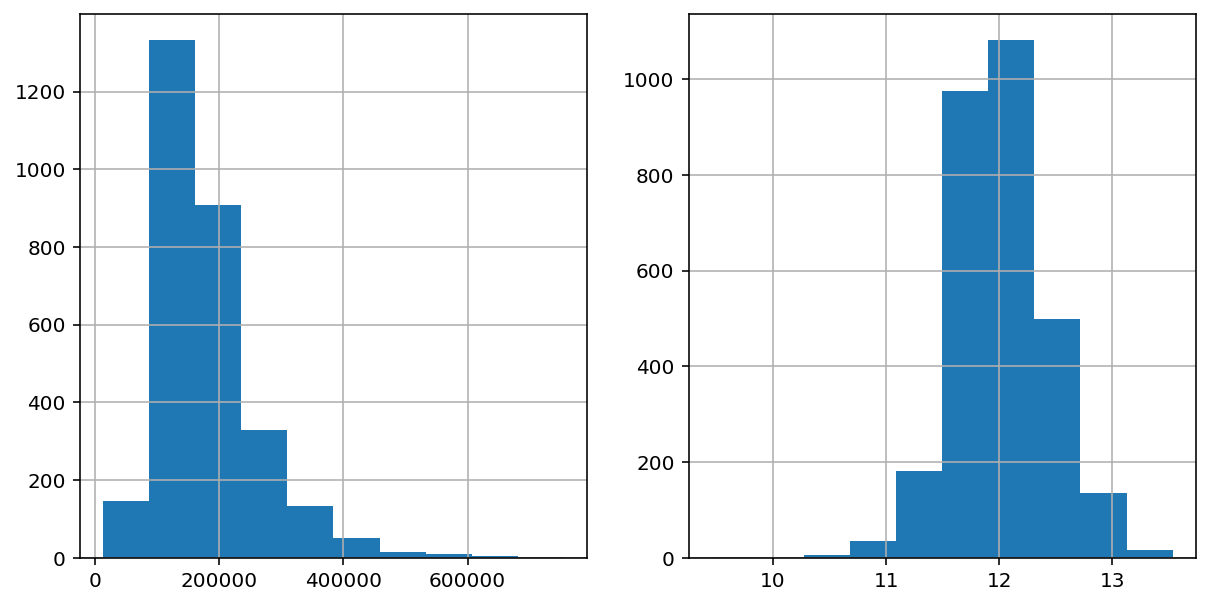

In [102]:
field='SalePrice'

fig,(ax_before,ax_after)=plt.subplots(1,2,figsize=(10,5))

data[field].hist(ax=ax_before)


data[field].apply(np.log1p).hist(ax=ax_after)

In [108]:
#PERFORM THE SKEW TRANSFORMATION

for col in skew_cols.index.values:
    if col=='SalePrice':
        continue
    data[col]=data[col].apply(np.log1p)

In [109]:
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2358
Alley             2732
Misc Feature      2824
Pool QC           2917
Length: 82, dtype: int64

In [117]:
smaller_df=data_rem_outliers.loc[:,['Lot Area','Overall Qual','Garage Cars','SalePrice','Full Bath','Year Built','Overall Cond','Fireplaces']]
smaller_df

,Lot Area,Overall Qual,Garage Cars,SalePrice,Full Bath,Year Built,Overall Cond,Fireplaces
0,31770,6,2.0,215000,1,1960,5,2
1,11622,5,1.0,105000,1,1961,6,0
2,14267,6,1.0,172000,1,1958,6,0
3,11160,7,2.0,244000,2,1968,5,2
4,13830,5,2.0,189900,2,1997,5,1
...,...,...,...,...,...,...,...,...
2925,7937,6,2.0,142500,1,1984,6,0
2926,8885,5,2.0,131000,1,1983,5,0
2927,10441,5,0.0,132000,1,1992,5,0
2928,10010,5,2.0,170000,1,1974,5,1


In [118]:
smaller_df.describe()

,Lot Area,Overall Qual,Garage Cars,SalePrice,Full Bath,Year Built,Overall Cond,Fireplaces
count,2904.000000,2904.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,10032.978994,6.077135,1.760248,178970.896006,1.557163,1971.387397,5.561983,0.591942
std,7700.524148,1.395668,0.756578,76228.986560,0.544446,30.139549,1.106901,0.642788
min,1300.000000,1.000000,0.000000,12789.000000,0.000000,1872.000000,1.000000,0.000000
25%,7420.000000,5.000000,1.000000,129000.000000,1.000000,1954.000000,5.000000,0.000000
50%,9375.000000,6.000000,2.000000,160000.000000,2.000000,1973.000000,5.000000,1.000000
75%,11461.500000,7.000000,2.000000,212999.250000,2.000000,2001.000000,6.000000,1.000000
max,215245.000000,10.000000,5.000000,615000.000000,4.000000,2010.000000,9.000000,4.000000


In [119]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 0 to 2929
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lot Area      2904 non-null   int64  
 1   Overall Qual  2904 non-null   int64  
 2   Garage Cars   2903 non-null   float64
 3   SalePrice     2904 non-null   int64  
 4   Full Bath     2904 non-null   int64  
 5   Year Built    2904 non-null   int64  
 6   Overall Cond  2904 non-null   int64  
 7   Fireplaces    2904 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 204.2 KB


In [122]:
smaller_df=smaller_df.fillna(0)

In [123]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 0 to 2929
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lot Area      2904 non-null   int64  
 1   Overall Qual  2904 non-null   int64  
 2   Garage Cars   2904 non-null   float64
 3   SalePrice     2904 non-null   int64  
 4   Full Bath     2904 non-null   int64  
 5   Year Built    2904 non-null   int64  
 6   Overall Cond  2904 non-null   int64  
 7   Fireplaces    2904 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 204.2 KB


# PAIR PLOT

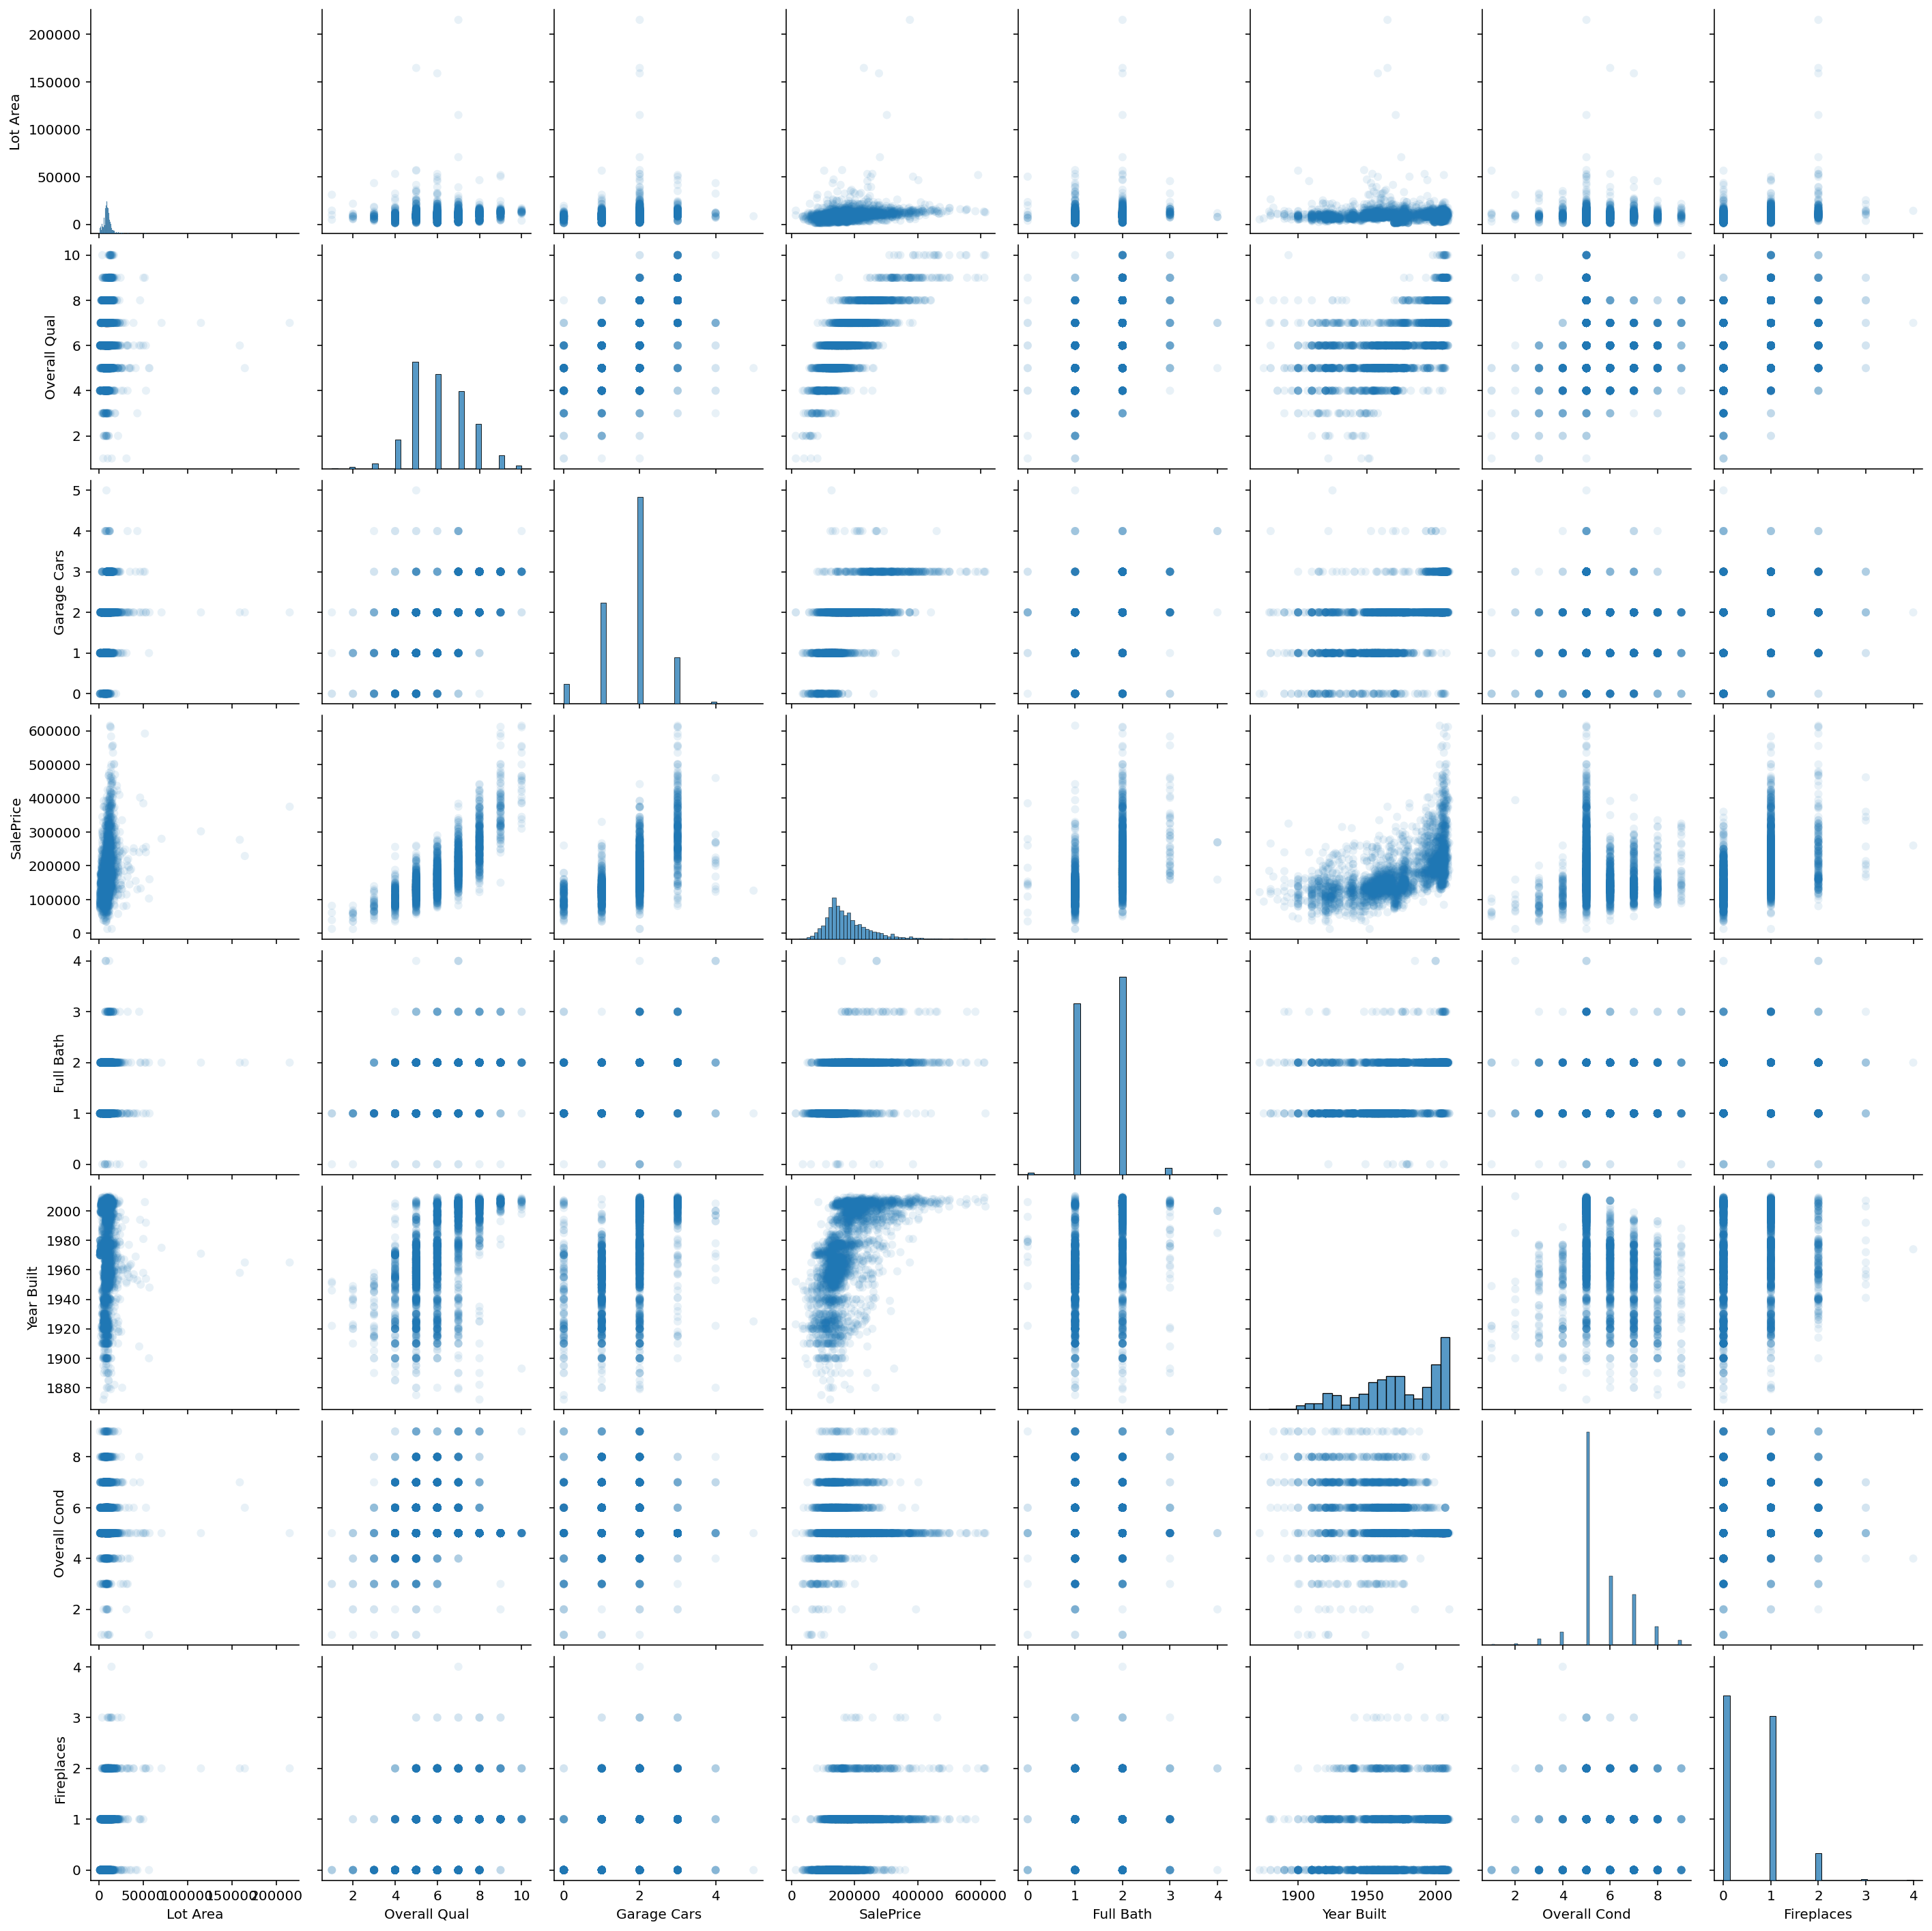

In [124]:
sns.pairplot(smaller_df,plot_kws=dict(alpha=0.1,edgecolor="none"))